## 感知机 Perceptron

### 条件：二分类、线性可分

- 输入：训练数据集$T=[(x_1, y_1), ···, (x_N, y_N)]$，学习率$\eta$
- 1 任意超平面 $w_0, b_0$, 即$y = w_0*x + b_0$
- 2 采用梯度下降法极小化目标函数
-- loss：$L(w, b) = - \sum y_i(w*x_i+b)$
--  $$\nabla_{w} L(w, b) = - \sum y_i*x_i \\
         \nabla_{b} L(w, b) = -\sum y_i$$
- 3 更新w, b
-- $$ w:= w + \eta * y_i * x_i \\
         b := b + \eta * y_i
$$



# 例2.1 正实例点$x_1 = (3, 3)^T, x_2 = (4, 3)^T$, 负实例点$x_3 = (1, 1)^T$，试用感知机学习算法求感知机模型

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
class MyPerceptron:
    def __init__(self):
        self.w = None
        self.b = 0
        self.l_rate = 1
        
    def fit(self, X_train, y_train):
        self.w = np.zeros(X_train.shape[1])
        i = 0
        while i < X_train.shape[0]:
            X = X_train[i]
            y = y_train[i]
            
            # condition
            if y * (np.dot(self.w, X) + self.b) <= 0:
                self.w = self.w + self.l_rate * np.dot(y, X)
                self.b = self.b + self.l_rate * y
                i = 0
            else:
                i += 1

In [6]:
def draw(X, w, b):
    X_new = np.array([[0], [6]])
    y_predict = - (b + w[0] * X_new) / w[1]
    print(y_predict)
    
    # 绘制点
    plt.plot(X[:2, 0], X[:2, 1], "g*", label = 1)
    plt.plot(X[2:, 0], X[2:, 1], "rx", label = -1)
    
    # 分类超平面
    plt.plot(X_new, y_predict, "b-")
    
    plt.axis([0, 6, 0, 6])
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.legend()
    plt.show()
    

weight:  [1. 1.]
bias:  -3
[[ 3.]
 [-3.]]


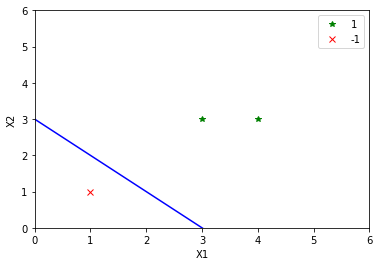

In [8]:
# 构建样本
# 正实例 [3, 3] [4, 3]  负实例 [1, 1]
X_train = np.array([[3, 3], [4, 3], [1, 1]])
y_train = np.array([1, 1, -1])

# 构建 perceptron
model = MyPerceptron()
model.fit(X_train, y_train)
print("weight: ", model.w)
print("bias: ", model.b)

draw(X_train, model.w, model.b)


# 感知机-对偶形式

- 输入：线性可分数据$T = {(x_1, y_1), (x_2, y_2), \cdot, (x_N, y_N)}$
- 其中 $x_i \in R^n, y_i \in {-1, +1}, i = 1, 2, 3, \cdot, N$；学习率 $\eta (0 \leq \eta \leq 1)$
- 输出：$a, b$, 感知机模型$f(x) = sign(\sum_{j=1}^N \alpha_j y_j x_j \cdot x + b)$,
- 其中$\alpha = (\alpha_1, \alpha_2, \cdot, \alpha_N)^T$
- (1) $\alpha \leftarrow 0, b \leftarrow 0$
- (2) 在训练集上选取数据$(x_i, y_i)$
- (3) 如果$y_i(\sum_{j=1}^N \alpha_j y_j x_j \cdot + b) \leq 0$
$$
\alpha_i \leftarrow \alpha_i + \eta \\
b \leftarrow b + \eta y_i
$$

# 例2.2 正实例点$x_1 = (3, 3)^T, x_2 = (4, 3)^T$, 负实例点$x_3 = (1, 1)^T$，试用感知机-对偶学习算法求感知机模型

In [9]:
# import numpy as np
# import matplotlib.pyplot as plt

# 对偶性二元分类器
class MyPerceptron_duality:
    def __init__(self):
        self.a = None
        self.b = 0
        self.l_rate = 1
        
    def fit(self, X_train, y_train):
        
        # Gram矩阵
        G = np.dot(X_train, X_train.T)
        
        self.a = np.zeros(X_train.shape[0])
        i = 0
        while i < X_train.shape[0]:
            X = X_train[i]
            y = y_train[i]
            
            # conditon
            temp = 0
            for j in range(X_train.shape[0]):
                tmp = self.a[j] * y_train[j] * G[j, i]
                temp += tmp
            print(temp.shape, temp)
            
            if y * (temp + self.b) <= 0:
                self.a[i] = self.a[i] + self.l_rate
                self.b = self.b + self.l_rate * y
                i = 0
            else:
                i += 1

In [10]:
# 构建样本
# 正实例 [3, 3] [4, 3]  负实例 [1, 1]
X_train = np.array([[3, 3], [4, 3], [1, 1]])
y_train = np.array([1, 1, -1])

# 构建 perceptron
model = MyPerceptron_duality()
model.fit(X_train, y_train)
print("a: ", model.a)
print("b: ", model.b)

# draw(X_train, model.w, model.b)

() 0.0
() 18.0
() 21.0
() 6.0
() 12.0
() 14.0
() 4.0
() 6.0
() 7.0
() 2.0
() 0.0
() 18.0
() 21.0
() 6.0
() 12.0
() 14.0
() 4.0
() 6.0
() 7.0
() 2.0
a:  [2. 0. 5.]
b:  -3


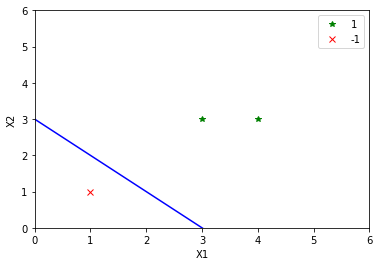

In [14]:
def draw_duality(X, a, b):
    w = np.dot((a * y_train).T, X)
    
    X_new = np.array([[0], [6]])
    y_predict = - (b + w[0] * X_new) / w[1]
    
    # 绘制点
    plt.plot(X[:2, 0], X[:2, 1], "g*", label = 1)
    plt.plot(X[2:, 0], X[2:, 1], "rx", label = -1)
    
    # 分类超平面
    plt.plot(X_new, y_predict, "b-")
    
    plt.axis([0, 6, 0, 6])
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.legend()
    plt.show()
    
draw_duality(X_train, model.a, model.b)